#  Independent Investigation of Coupon Acceptance

## Introduction

### Background

Building upon our comprehensive analysis of bar coupon acceptance, this notebook embarks on an independent investigation into other coupon categories. The primary focus will be on 'Coffee House' and 'Carry out & Take away' coupons. Our objective is to identify and understand the characteristics of passengers who are more likely to accept these specific types of coupons.

### Objectives

- **Explore Coupon Acceptance Patterns**: Analyze the trends and behaviors associated with the acceptance of 'Coffee House' and 'Carry out & Take away' coupons.
- **Identify Key Influencers**: Determine the primary factors that influence a passenger's decision to accept these coupons, drawing comparisons and contrasts with our findings from the bar coupon analysis.
- **Provide Strategic Insights**: Offer actionable insights for businesses to tailor their marketing strategies effectively for these specific coupon categories.

### Approach

- **Data Analysis**: Utilize the same dataset as the bar coupon study, applying statistical and data visualization techniques to extract relevant insights.
- **Comparative Analysis**: Compare the findings with the bar coupon analysis to identify unique or common patterns in coupon acceptance behavior.
- **Recommendations**: Conclude with strategic recommendations based on the analysis, aimed at enhancing the effectiveness of coupon-based promotions for 'Coffee House' and 'Carry out & Take away' establishments.

*Let's dive into the data and uncover the driving factors behind coupon acceptance for these popular categories.*

---

**Note**: This notebook is a continuation of our series on coupon acceptance analysis. For background information and initial findings, refer to the previous notebook focused on bar coupons: [Bar Coupon Acceptance Analysis](DriverCouponAnalysis_1.ipynb).


In [12]:
import math
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import plotly.offline as pyo
import io
# Initialize the image buffer only once
buffer = io.BytesIO()
import base64
import os
import sys
sys.path.append(os.getcwd())
from BarPlotter import create_subplot_grid_dflist, create_stacked_bar_plot, create_stacked_bar_plot_multi, create_overall_stacked_bar_plot,create_stacked_bar_plot_with_filters, create_subplot_grid, save_plot_as_base64
from IPython.display import Markdown
sns.set(style="darkgrid")

In [13]:
# 1. Read in the coupons_cleaned.csv file.
df_cleaned = pd.read_csv('data/coupons_cleaned.csv')

In [14]:
df_cleaned['coupon'].value_counts()

Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: coupon, dtype: int64

In [15]:
df_cleaned['CoffeeHouse'].value_counts()

less1        3385
1~3          3225
never        2962
4~8          1784
gt8          1111
no answer     217
Name: CoffeeHouse, dtype: int64


# 9. Comprehensive Analysis of Coffee House Coupons

In this section, we embark on an in-depth analysis of Coffee House related coupons. Our focus is to understand the acceptance patterns of these coupons, assessing how different customer attributes and behaviors influence their decisions. This thorough examination aims to provide valuable insights into the effectiveness of Coffee House coupons and strategies for optimizing their impact.

# 9.1 Overall Coffee House Coupon Acceptance Rate

We begin our exploration by examining the overall acceptance rate of Coffee House coupons.

- **Total Coffee House Coupons**: There were **3996** Coffee House coupon offers in our dataset.
- **Accepted Coffee House Coupons**: Out of these, **1995** were accepted, translating to an acceptance rate of **49.92%**.
- **Contextual Comparison**: Compared to the total of **12684** coupon offers and total acceptance rate of **56.84%**, both the acceptance rate and the frequency of Coffee House coupon offers are relatively low.

This initial finding suggests the need for a more nuanced analysis to understand the factors influencing the acceptance of Coffee House coupons. Subsequent sections will delve into specific aspects of Coffee House coupon usage, considering various customer attributes and behaviors.

<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                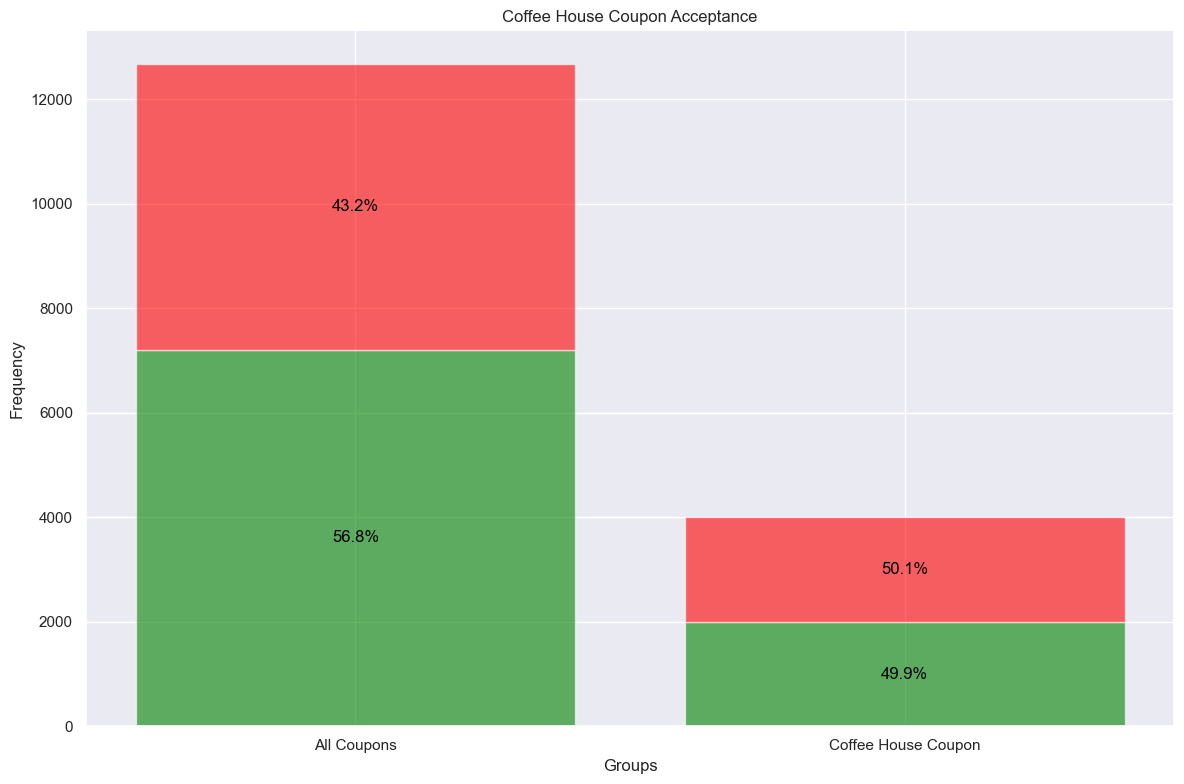
                <em>Figure: Coffee House Coupons Acceptance Rate</em>
            </td>
        </tr>
    </table>
</div>


In [46]:
total_count = len(df_cleaned)
accepted_count = df_cleaned['Y'].value_counts()
proportion_data = accepted_count / total_count

coffee_filter = df_cleaned.eval("coupon == 'Coffee House'")
coffee_df = df_cleaned.query("coupon == 'Coffee House'").copy()

total_count = len(df_cleaned)
coffee_total_count = len(coffee_df)
coffee_frequency_count = coffee_df['Y'].value_counts()
coffee_proportion_data = coffee_frequency_count / len(coffee_df)

filters = [None, coffee_filter]
filter_labels = ['All Coupons', 'Coffee House Coupon']

coffee_coupon_overall_acceptance_image64 = create_stacked_bar_plot_with_filters(filters, filter_labels, "Coffee House Coupon Acceptance", None, df_cleaned, rotation=0, yscale='linear')

markdown_text = f"""
# 9. Comprehensive Analysis of Coffee House Coupons

In this section, we embark on an in-depth analysis of Coffee House related coupons. Our focus is to understand the acceptance patterns of these coupons, assessing how different customer attributes and behaviors influence their decisions. This thorough examination aims to provide valuable insights into the effectiveness of Coffee House coupons and strategies for optimizing their impact.

# 9.1 Overall Coffee House Coupon Acceptance Rate

We begin our exploration by examining the overall acceptance rate of Coffee House coupons.

- **Total Coffee House Coupons**: There were **{coffee_total_count}** Coffee House coupon offers in our dataset.
- **Accepted Coffee House Coupons**: Out of these, **{coffee_frequency_count[1]}** were accepted, translating to an acceptance rate of **{coffee_proportion_data[1]:.2%}**.
- **Contextual Comparison**: Compared to the total of **{total_count}** coupon offers and total acceptance rate of **{proportion_data[1]:.2%}**, both the acceptance rate and the frequency of Coffee House coupon offers are relatively low.

This initial finding suggests the need for a more nuanced analysis to understand the factors influencing the acceptance of Coffee House coupons. Subsequent sections will delve into specific aspects of Coffee House coupon usage, considering various customer attributes and behaviors.

<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                <img src="data:image/png;base64,{coffee_coupon_overall_acceptance_image64}" alt="Coffee House Coupons Acceptance Rate" style="width: 100%;"/>
                <em>Figure: Coffee House Coupons Acceptance Rate</em>
            </td>
        </tr>
    </table>
</div>
"""

display(Markdown(markdown_text))


In [47]:
# Create a DataFrame to store the column names and the number of distinct values
distinct_values_df = pd.DataFrame({
    'Column Name': df_cleaned.columns,
    'Number of Distinct Values': [df_cleaned[column].nunique() for column in df_cleaned.columns]
})

print(distinct_values_df['Column Name'])

0              destination
1                passenger
2                  weather
3              temperature
4                     time
5                   coupon
6               expiration
7                   gender
8                      age
9            maritalStatus
10            has_children
11               education
12              occupation
13                  income
14                     Bar
15             CoffeeHouse
16               CarryAway
17    RestaurantLessThan20
18        Restaurant20To50
19        toCoupon_GEQ5min
20       toCoupon_GEQ15min
21       toCoupon_GEQ25min
22          direction_same
23           direction_opp
24                       Y
25          income_bracket
26    travel_time_category
Name: Column Name, dtype: object


In [48]:
df_cleaned.columns

Index(['destination', 'passenger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y', 'income_bracket', 'travel_time_category'],
      dtype='object')


# 9.2 Preliminary Holistic Analysis of Coffee House Coupon Acceptance 

## Overview
In this section, we initiate our exploration of Coffee House coupon acceptance by focusing on a range of user and contextual attributes. This preliminary analysis serves as a foundational step before we delve deeper into understanding the characteristics of passengers who accept these coupons.

<br>

This section presents a preliminary holistic analysis of Coffee House coupon acceptance rates, focusing on various attributes of drivers who received these coupons. Before delving into a detailed analysis, particularly on passenger characteristics, this overview provides an initial understanding of the dynamics influencing coupon acceptance.

## Attributes for Preliminary Analysis

For our initial analysis, we consider the following attributes, particularly for Coffee House coupons:

1. **Contextual Attributes**: 
   - Destination
   - Travel Time
   - Weather
   - Temperature
   - Time
   - Passenger
   - Direction Same
 

<br>

2. **User Attributes**:
   - Gender
   - Age
   - Marital Status
   - Has Children
   - Income
   - Income Bracket
   
## Methodology

- **Data Selection**: The analysis focused on drivers who were offered Coffee House coupons.
- **Visualization Approach**: We created a series of bar plots, each showcasing the acceptance rate for a single attribute.

## Findings and Observations

### Coffee House Coupon Acceptance by Various Factors

1. **Destination Influence**: 
   - Drivers heading to "No Urgent Place" showed a higher acceptance rate of 58.1%.
   - The lowest acceptance rate, at 36.2%, was observed among drivers heading home.

2. **Passenger Impact**: 
   - Acceptance rates were significantly higher (in the high 50s) when drivers had friends or partners as passengers.
   - Acceptance rate for drivers alone was notably lower at 43%, a counterintuitive finding that warrants further investigation.

3. **Weather Conditions**: 
   - Sunny weather correlated with the highest acceptance rate at 61.1%.
   - Snowy weather resulted in the lowest acceptance rate of 43.1%.

4. **Time of Coupon Offer**: 
   - 10 AM offers saw acceptance rates over 60%, aligning with typical coffee consumption times.
   - 7 AM offers had an surprisingly low acceptance rate of 44% for Coffee House coupons

5. **Travel Time**: 
   - Acceptance rates based on travel time to the destination indicated a potential preference for convenience.

6. **Expiration Periods**: 
   - Coupons with a 1-day expiration had higher acceptance rates than those with a 2-hour limit.

7. **Gender Differences**: 
   - Acceptance rates were evenly split between males and females.

8. **Age Group Patterns**: 
   - The under 30 age group had the highest acceptance rate.

9. **Marital Status**: 
   - All categories were in the 50% range, with a skewed distribution towards single and married individuals.

10. **Parental Status**: 
   - Parental status did not significantly impact acceptance rates.

11. **Income Bracket**: 
   - Higher acceptance rates were observed in lower income brackets.

These observations provide a baseline for our subsequent in-depth analysis, particularly focusing on the characteristics of passengers who accept Coffee House coupons.


<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                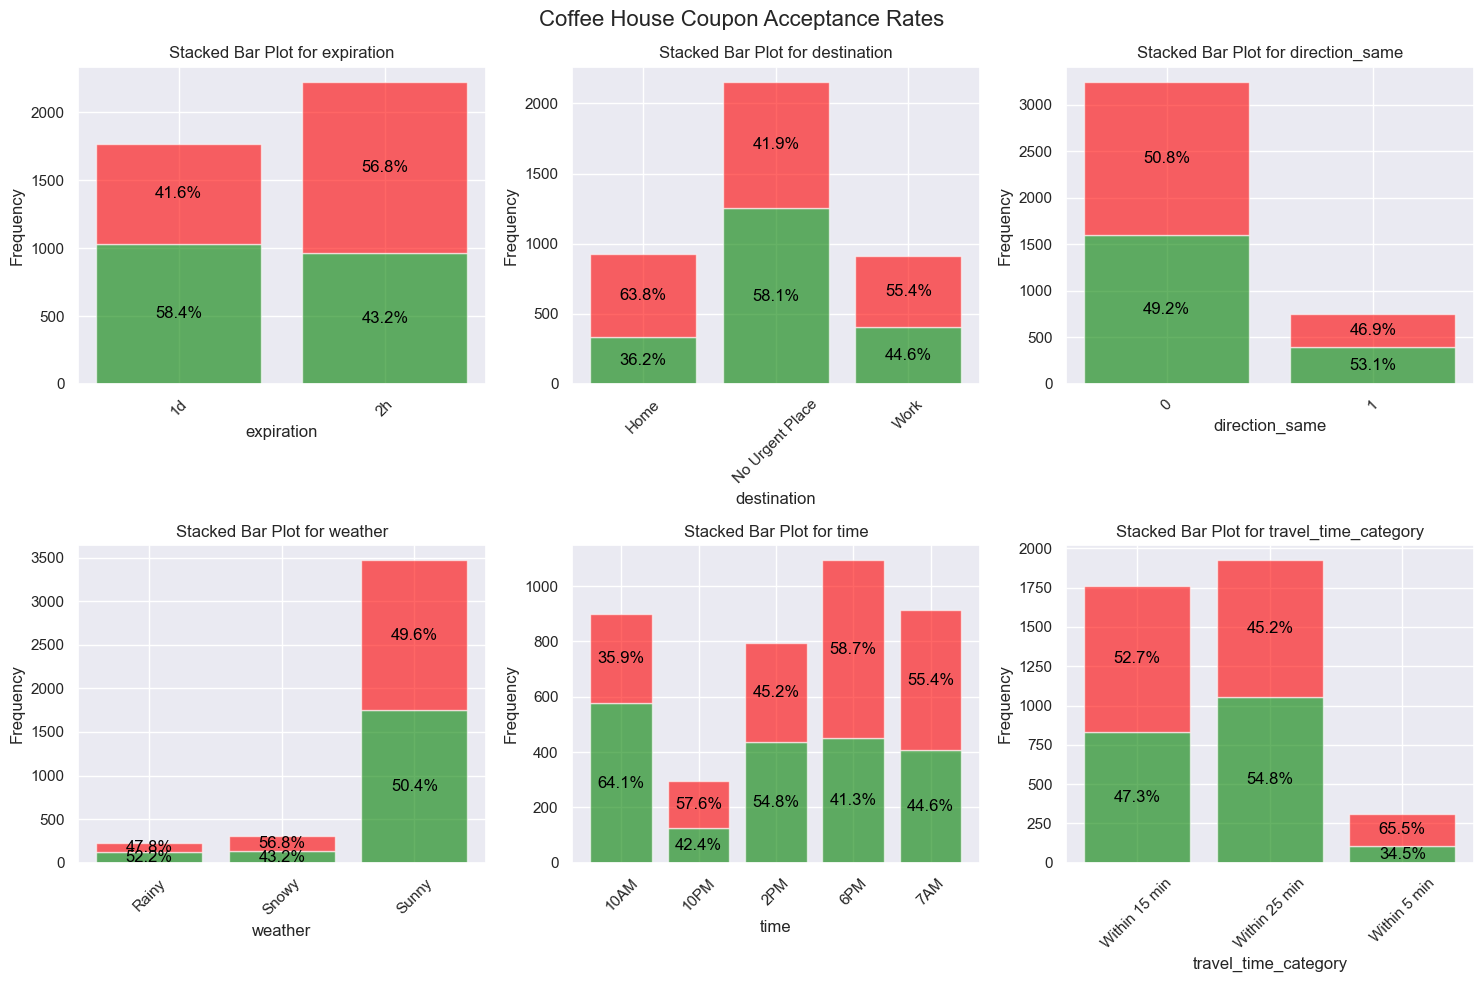
                <em>Figure: Coffee House Coupon Acceptance Rates By Various Factors</em>
            </td>
        </tr>
       <tr><td><br><br><br></td></tr>
        <tr>
            <td style="text-align: center;">
                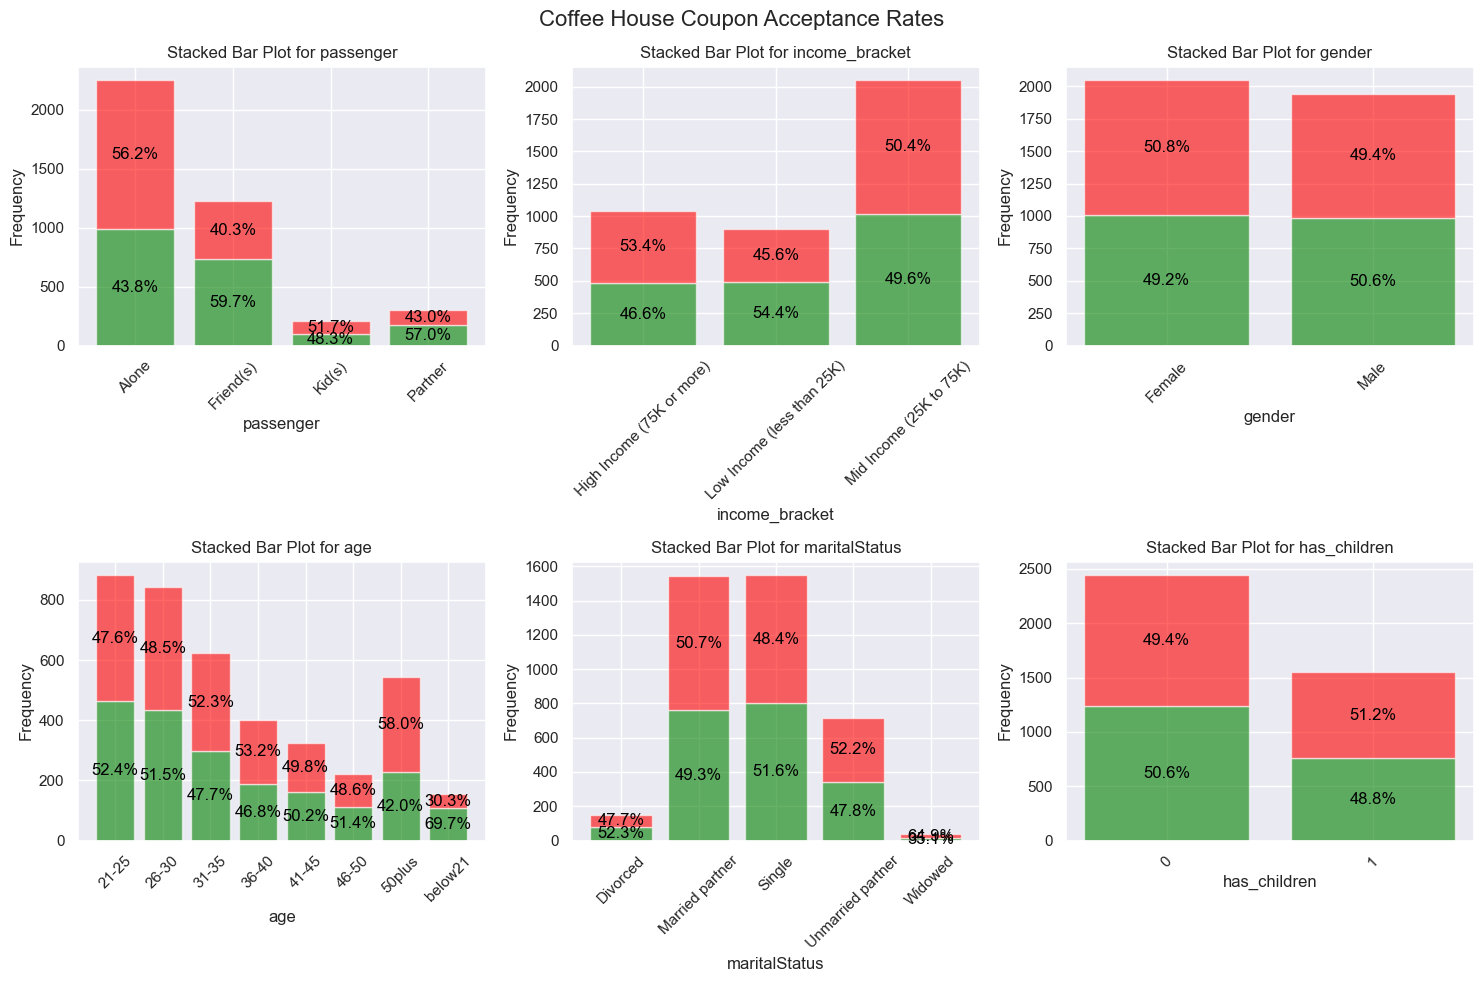
                <em>Figure: Coffee House Coupon Acceptance Rates By Demographics</em>
            </td>
        </tr>
    </table>
</div>

## Initial Conclusions

- **Target Specific Demographics**: Tailoring Coffee House coupon offers to specific demographics, especially younger age groups, may increase acceptance rates.
- **Focus on Peak Hours**: Offering coupons during popular coffee consumption times, such as mornings, seems effective.
- **Consider Weather Impact**: Adapt marketing strategies to consider the influence of weather conditions on coupon acceptance.
- **Engage Drivers with Specific Companions**: Drivers traveling with friends or partners show a higher likelihood of accepting Coffee House coupons.

---





In [54]:

columns_to_plot = [ 'expiration','destination', 'direction_same', 'weather', 'time', 'travel_time_category']
grid1_image64=create_subplot_grid(coffee_df, columns_to_plot, 'Coffee House Coupon Acceptance Rates',45)
columns_to_plot = ['passenger','income_bracket', 'gender', 'age', 'maritalStatus', 'has_children']
grid2_image64=create_subplot_grid(coffee_df, columns_to_plot, 'Coffee House Coupon Acceptance Rates',45)


markdown_text = f"""
# 9.2 Preliminary Holistic Analysis of Coffee House Coupon Acceptance 

## Overview
In this section, we initiate our exploration of Coffee House coupon acceptance by focusing on a range of user and contextual attributes. This preliminary analysis serves as a foundational step before we delve deeper into understanding the characteristics of passengers who accept these coupons.

<br>

This section presents a preliminary holistic analysis of Coffee House coupon acceptance rates, focusing on various attributes of drivers who received these coupons. Before delving into a detailed analysis, particularly on passenger characteristics, this overview provides an initial understanding of the dynamics influencing coupon acceptance.

## Attributes for Preliminary Analysis

For our initial analysis, we consider the following attributes, particularly for Coffee House coupons:

1. **Contextual Attributes**: 
   - Destination
   - Travel Time
   - Weather
   - Temperature
   - Time
   - Passenger
   - Direction Same
 

<br>

2. **User Attributes**:
   - Gender
   - Age
   - Marital Status
   - Has Children
   - Income
   - Income Bracket
   
## Methodology

- **Data Selection**: The analysis focused on drivers who were offered Coffee House coupons.
- **Visualization Approach**: We created a series of bar plots, each showcasing the acceptance rate for a single attribute.

## Findings and Observations

### Coffee House Coupon Acceptance by Various Factors

1. **Destination Influence**: 
   - Drivers heading to "No Urgent Place" showed a higher acceptance rate of 58.1%.
   - The lowest acceptance rate, at 36.2%, was observed among drivers heading home.

2. **Passenger Impact**: 
   - Acceptance rates were significantly higher (in the high 50s) when drivers had friends or partners as passengers.
   - Acceptance rate for drivers alone was notably lower at 43%, a counterintuitive finding that warrants further investigation.

3. **Weather Conditions**: 
   - Sunny weather correlated with the highest acceptance rate at 61.1%.
   - Snowy weather resulted in the lowest acceptance rate of 43.1%.

4. **Time of Coupon Offer**: 
   - 10 AM offers saw acceptance rates over 60%, aligning with typical coffee consumption times.
   - 7 AM offers had an surprisingly low acceptance rate of 44% for Coffee House coupons

5. **Travel Time**: 
   - Acceptance rates based on travel time to the destination indicated a potential preference for convenience.

6. **Expiration Periods**: 
   - Coupons with a 1-day expiration had higher acceptance rates than those with a 2-hour limit.

7. **Gender Differences**: 
   - Acceptance rates were evenly split between males and females.

8. **Age Group Patterns**: 
   - The under 30 age group had the highest acceptance rate.

9. **Marital Status**: 
   - All categories were in the 50% range, with a skewed distribution towards single and married individuals.

10. **Parental Status**: 
   - Parental status did not significantly impact acceptance rates.

11. **Income Bracket**: 
   - Higher acceptance rates were observed in lower income brackets.

These observations provide a baseline for our subsequent in-depth analysis, particularly focusing on the characteristics of passengers who accept Coffee House coupons.


<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                <img src="data:image/png;base64,{grid1_image64}" alt="Coffee House Coupon Acceptance Rates By Various Factors" style="width: 100%;"/>
                <em>Figure: Coffee House Coupon Acceptance Rates By Various Factors</em>
            </td>
        </tr>
       <tr><td><br><br><br></td></tr>
        <tr>
            <td style="text-align: center;">
                <img src="data:image/png;base64,{grid2_image64}" alt="Coffee House Coupon Acceptance Rates By Demographics" style="width: 100%;"/>
                <em>Figure: Coffee House Coupon Acceptance Rates By Demographics</em>
            </td>
        </tr>
    </table>
</div>

## Initial Conclusions

- **Target Specific Demographics**: Tailoring Coffee House coupon offers to specific demographics, especially younger age groups, may increase acceptance rates.
- **Focus on Peak Hours**: Offering coupons during popular coffee consumption times, such as mornings, seems effective.
- **Consider Weather Impact**: Adapt marketing strategies to consider the influence of weather conditions on coupon acceptance.
- **Engage Drivers with Specific Companions**: Drivers traveling with friends or partners show a higher likelihood of accepting Coffee House coupons.

---



"""

display(Markdown(markdown_text))


# 9.3 Coffee House Coupon Acceptance of Passengers by Time

## Overview

This section analyzes how the time of day affects Coffee House coupon acceptance among passengers. It aims to identify temporal trends in coupon acceptance, informing more effective timing for promotional offers.

## Methodology

- **Data Selection**: Analysis focused on drivers offered Coffee House coupons, segmented by time of day.
- **Visualization Approach**: Bar plots were used to illustrate the acceptance rate across different passenger categories by time, enabling an understanding of peak and off-peak acceptance periods.

## Findings and Observations

1. **Analysis of Time-Specific Acceptance and Offer Count:**
   - **Travelling Alone**: 
     - A noteworthy gap at 2 PM, where there were zero offers despite being a prime coffee time. 
     - Highest acceptance rate at 10 AM (61.46%) but with a relatively lower total count (371), suggesting an opportunity to increase offers during this time.
   - **Travelling with Friends**: 
     - No offers at 7 AM, missing the potential morning commute market. 
     - Strong acceptance in the evening (10 PM at 68.27%) but with a lower offer count (104), indicating a need to increase evening promotions for groups.
   - **Travelling with Partner**: 
     - Lack of offers at both 7 AM and 10 PM, key times that could cater to couple activities.
     - Balanced acceptance rates throughout the day but relatively low total counts, suggesting an opportunity to increase the number of offers.
   - **Travelling with Kids**: 
     - Zero offers at 7 AM and 10 PM, aligning with likely family routines. 
     - High acceptance at 10 AM (72.97%) but with only 37 offers, highlighting a missed opportunity for morning promotions targeting families.

2. **Opportunities for Strategic Marketing Adjustments:**
   - **Targeting Individual Customers**: Introducing or increasing offers around 2 PM for solo travelers can capture the midday coffee market.
   - **Capitalizing on High Acceptance Rates**: Situations with high acceptance but low offer counts, like solo travelers at 10 AM and groups at 10 PM, are prime for increased coupon distribution.
   - **Expanding Morning Offers**: For groups and families, early morning promotions could tap into potential high-demand periods, especially given the current lack of offers.
   - **Evening Promotions for Partners**: The absence of offers in the evening for partners suggests a potential area for introducing targeted promotions.

3. **Conclusion:**
   - The analysis reveals specific times where coupon offers are either lacking or not fully capitalized upon. By adjusting the offer distribution to match these identified patterns, the Coffee House can potentially increase coupon acceptance rates and better engage various passenger categories.


<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                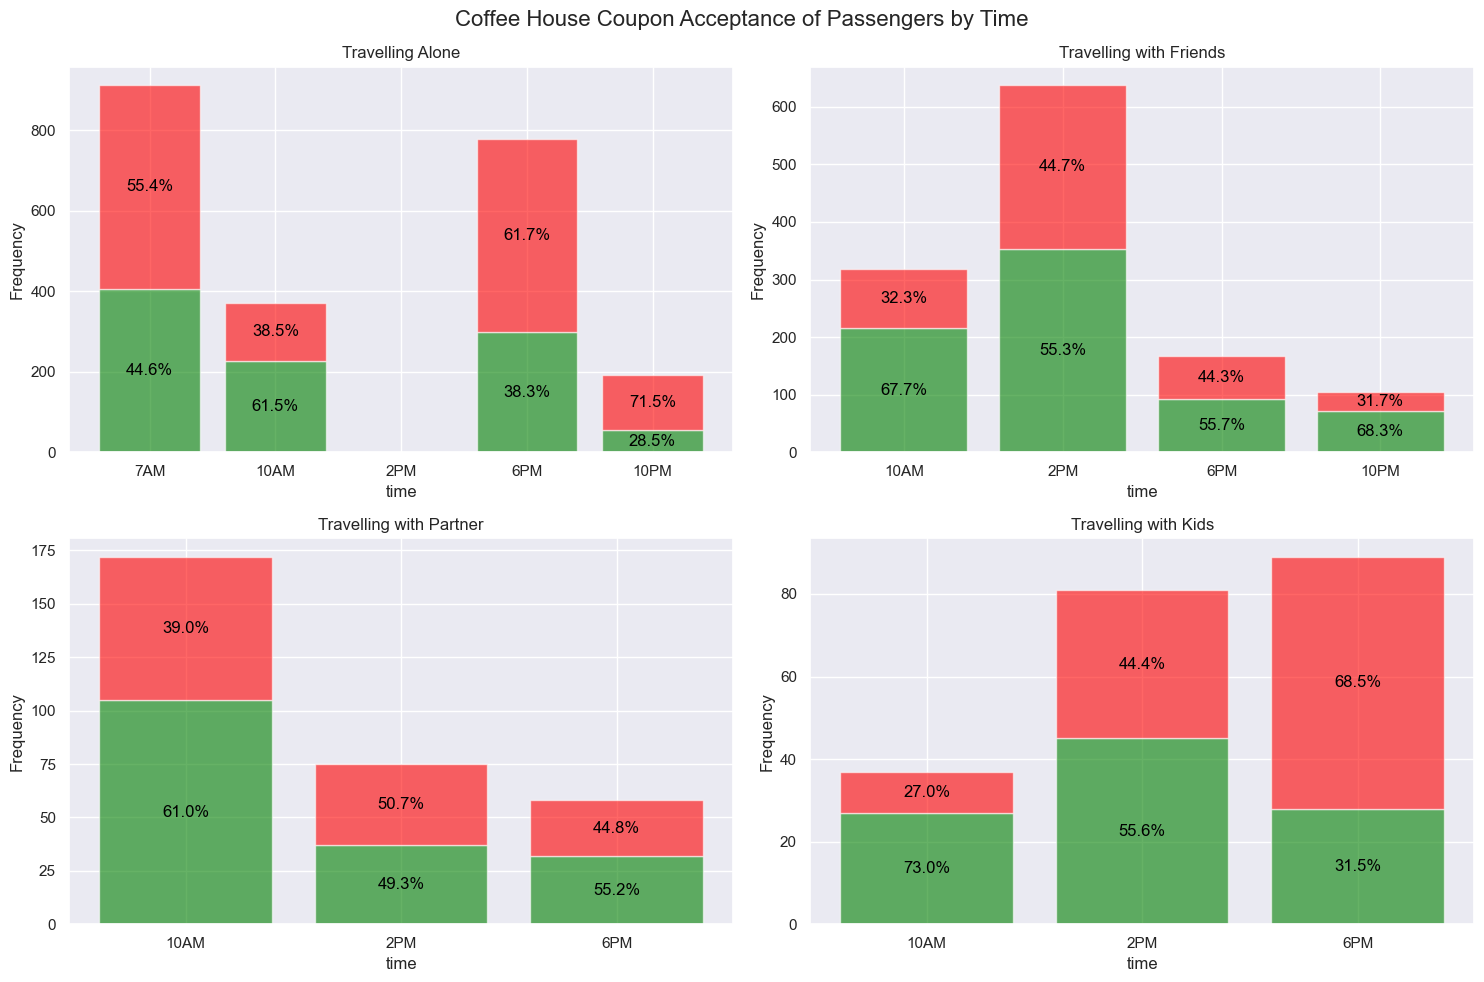
                <em>Figure: Coffee House Coupon Acceptance of Passengers by Time</em>
            </td>
        </tr>
    </table>
</div>

---


In [38]:

df_list = [
    coffee_df[coffee_df['passenger'] == 'Alone'],
    coffee_df[coffee_df['passenger'] == 'Friend(s)'],
    coffee_df[coffee_df['passenger'] == 'Partner'],
    coffee_df[coffee_df['passenger'] == 'Kid(s)']
]

subplot_labels =['Travelling Alone','Travelling with Friends','Travelling with Partner','Travelling with Kids'] 





plot_title = 'Coffee House Coupon Acceptance of Passengers by Time'


passenger_time_grid_image64, time_df = create_subplot_grid_dflist(df_list, 'time', plot_title, subplot_labels,0,'linear',['7AM','10AM','2PM','6PM','10PM'])


markdown_text = f"""
# 9.3 Coffee House Coupon Acceptance of Passengers by Time

## Overview

This section analyzes how the time of day affects Coffee House coupon acceptance among passengers. It aims to identify temporal trends in coupon acceptance, informing more effective timing for promotional offers.

## Methodology

- **Data Selection**: Analysis focused on drivers offered Coffee House coupons, segmented by time of day.
- **Visualization Approach**: Bar plots were used to illustrate the acceptance rate across different passenger categories by time, enabling an understanding of peak and off-peak acceptance periods.

## Findings and Observations

1. **Analysis of Time-Specific Acceptance and Offer Count:**
   - **Travelling Alone**: 
     - A noteworthy gap at 2 PM, where there were zero offers despite being a prime coffee time. 
     - Highest acceptance rate at 10 AM (61.46%) but with a relatively lower total count (371), suggesting an opportunity to increase offers during this time.
   - **Travelling with Friends**: 
     - No offers at 7 AM, missing the potential morning commute market. 
     - Strong acceptance in the evening (10 PM at 68.27%) but with a lower offer count (104), indicating a need to increase evening promotions for groups.
   - **Travelling with Partner**: 
     - Lack of offers at both 7 AM and 10 PM, key times that could cater to couple activities.
     - Balanced acceptance rates throughout the day but relatively low total counts, suggesting an opportunity to increase the number of offers.
   - **Travelling with Kids**: 
     - Zero offers at 7 AM and 10 PM, aligning with likely family routines. 
     - High acceptance at 10 AM (72.97%) but with only 37 offers, highlighting a missed opportunity for morning promotions targeting families.

2. **Opportunities for Strategic Marketing Adjustments:**
   - **Targeting Individual Customers**: Introducing or increasing offers around 2 PM for solo travelers can capture the midday coffee market.
   - **Capitalizing on High Acceptance Rates**: Situations with high acceptance but low offer counts, like solo travelers at 10 AM and groups at 10 PM, are prime for increased coupon distribution.
   - **Expanding Morning Offers**: For groups and families, early morning promotions could tap into potential high-demand periods, especially given the current lack of offers.
   - **Evening Promotions for Partners**: The absence of offers in the evening for partners suggests a potential area for introducing targeted promotions.

3. **Conclusion:**
   - The analysis reveals specific times where coupon offers are either lacking or not fully capitalized upon. By adjusting the offer distribution to match these identified patterns, the Coffee House can potentially increase coupon acceptance rates and better engage various passenger categories.


<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                <img src="data:image/png;base64,{passenger_time_grid_image64}" alt="Coffee House Coupon Acceptance of Passengers by Time" style="width: 100%;"/>
                <em>Figure: Coffee House Coupon Acceptance of Passengers by Time</em>
            </td>
        </tr>
    </table>
</div>

---
"""
display(Markdown(markdown_text))


# 9.4 Coffee House Coupon Acceptance of Passengers by Destination

## Overview

This section examines the impact of passenger destinations on Coffee House coupon acceptance. It seeks to uncover destination-specific trends in coupon acceptance, which can guide more effective location-based promotional strategies.

## Methodology

- **Data Selection**: The analysis was centered on passengers who received Coffee House coupons, categorized by their destinations.
- **Visualization Approach**: The study utilized bar plots to demonstrate acceptance rates among different passenger categories based on their destinations, highlighting patterns and potential target areas.

## Findings and Observations

1. **Destination-Specific Acceptance and Offer Count:**
   - **Travelling Alone**: 
     - 'No Urgent Place' showed the highest acceptance rate (58.56%) but with a moderate offer count (473), indicating potential for increased promotion.
     - The 'Home' destination had a lower acceptance rate (34.94%), suggesting lesser interest in coupons when heading home.
   - **Travelling with Friends**: 
     - The only available data was for the destination 'No Urgent Place', which showed a high acceptance rate (59.69%) with a significant offer count (1228). This highlights 'No Urgent Place' as an effective target destination for this category. However, the lack of data for other destinations in this category suggests an area for further exploration and data collection.
   - **Travelling with Partner**: 
     - Analysis shows similar acceptance rates for destinations 'No Urgent Place' and 'Home', though the number of offers for 'Home' is considerably lower, suggesting room to increase promotions for couples heading home. Notably, there are no offers recorded for the 'Work' destination. Considering that many people often drop their partners off at work, this could represent a missed opportunity for targeted coupon offers in this segment.
   - **Travelling with Kids**: 
     - The available data for this category is limited to the 'No Urgent Place' destination, which shows a nearly balanced acceptance rate (48.31%). This indicates a moderate level of interest in offers during casual outings. However, the absence of data for trips heading 'Home' represents a potential missed opportunity. Given the family dynamics, targeting offers for passengers traveling with kids on their way home could be an area worth exploring.

2. **Strategic Marketing Insights:**
   - **Emphasis on 'No Urgent Place'**: This destination consistently shows higher acceptance rates across all categories, marking it as a primary target for promotions.
   - **Enhanced Focus on Family and Couples Targeting**: Families show moderate interest, and couples exhibit consistent acceptance rates, indicating opportunities in these segments.
   - **Potential in Untapped Destinations**: The absence of data for some categories in destinations like 'Work' or 'Home' suggests a need for exploration in these areas.

3. **Conclusion:**
   - Understanding destination-based acceptance patterns offers valuable insights for tailoring Coffee House's promotional strategies. By aligning coupon offers with these insights, there is a potential to enhance overall acceptance and engagement.

<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                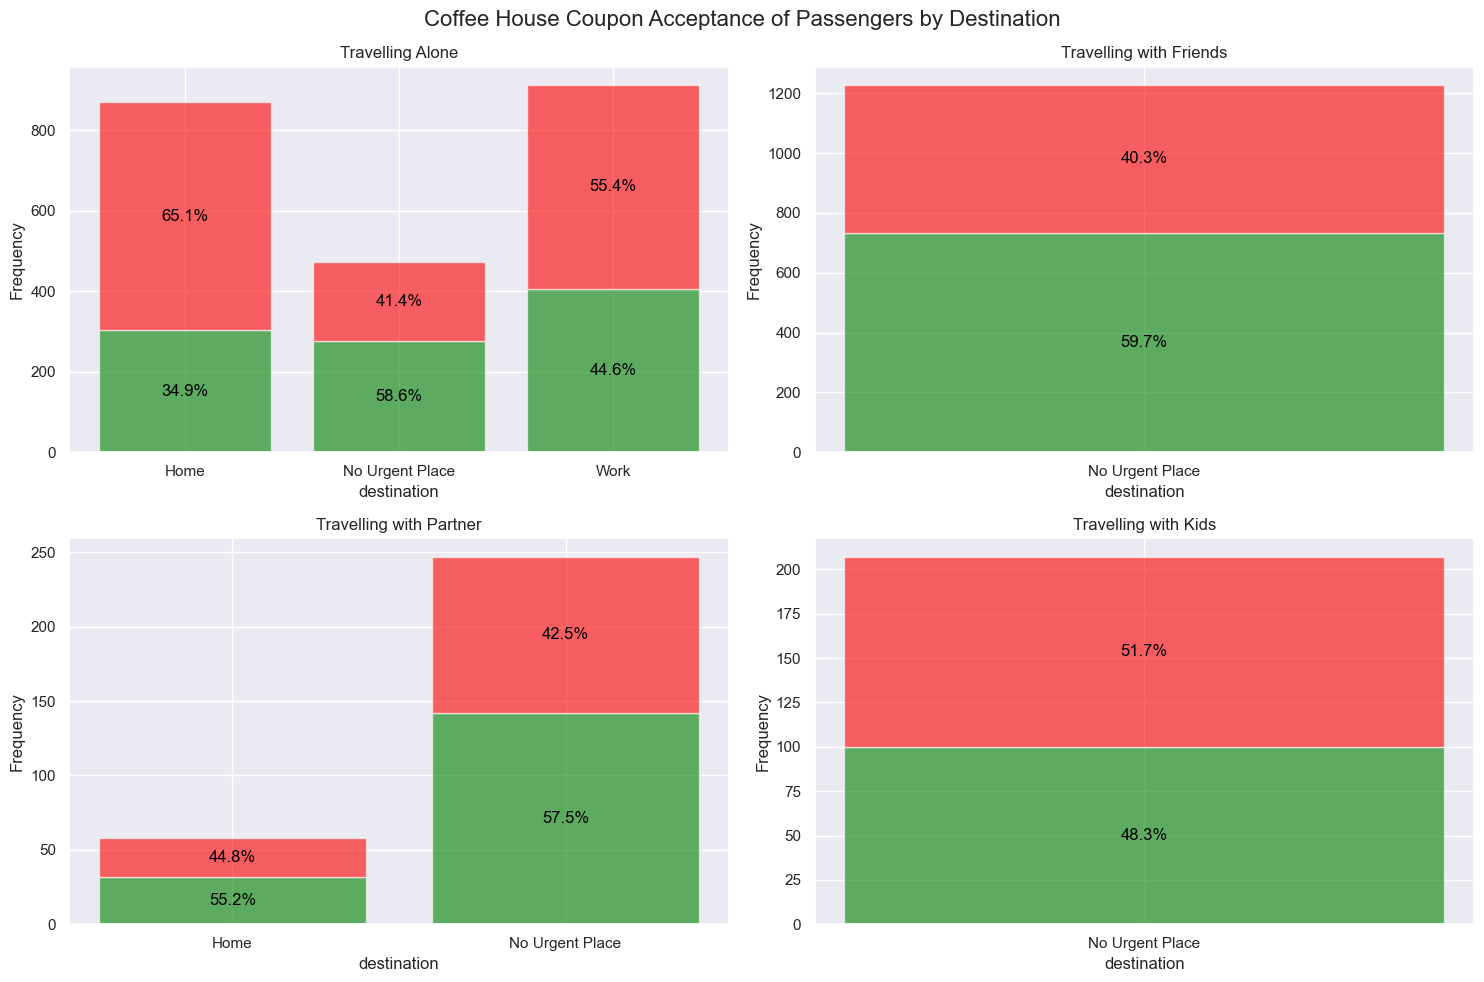
                <em>Figure: Coffee House Coupon Acceptance of Passengers by Destination</em>
            </td>
        </tr>
    </table>
</div>

---


In [42]:
plot_title = 'Coffee House Coupon Acceptance of Passengers by Destination'
passenger_destination_grid_image64, dest_df = create_subplot_grid_dflist(df_list, 'destination', plot_title, subplot_labels,0,'linear')

markdown_text = f"""
# 9.4 Coffee House Coupon Acceptance of Passengers by Destination

## Overview

This section examines the impact of passenger destinations on Coffee House coupon acceptance. It seeks to uncover destination-specific trends in coupon acceptance, which can guide more effective location-based promotional strategies.

## Methodology

- **Data Selection**: The analysis was centered on passengers who received Coffee House coupons, categorized by their destinations.
- **Visualization Approach**: The study utilized bar plots to demonstrate acceptance rates among different passenger categories based on their destinations, highlighting patterns and potential target areas.

## Findings and Observations

1. **Destination-Specific Acceptance and Offer Count:**
   - **Travelling Alone**: 
     - 'No Urgent Place' showed the highest acceptance rate (58.56%) but with a moderate offer count (473), indicating potential for increased promotion.
     - The 'Home' destination had a lower acceptance rate (34.94%), suggesting lesser interest in coupons when heading home.
   - **Travelling with Friends**: 
     - The only available data was for the destination 'No Urgent Place', which showed a high acceptance rate (59.69%) with a significant offer count (1228). This highlights 'No Urgent Place' as an effective target destination for this category. However, the lack of data for other destinations in this category suggests an area for further exploration and data collection.
   - **Travelling with Partner**: 
     - Analysis shows similar acceptance rates for destinations 'No Urgent Place' and 'Home', though the number of offers for 'Home' is considerably lower, suggesting room to increase promotions for couples heading home. Notably, there are no offers recorded for the 'Work' destination. Considering that many people often drop their partners off at work, this could represent a missed opportunity for targeted coupon offers in this segment.
   - **Travelling with Kids**: 
     - The available data for this category is limited to the 'No Urgent Place' destination, which shows a nearly balanced acceptance rate (48.31%). This indicates a moderate level of interest in offers during casual outings. However, the absence of data for trips heading 'Home' represents a potential missed opportunity. Given the family dynamics, targeting offers for passengers traveling with kids on their way home could be an area worth exploring.

2. **Strategic Marketing Insights:**
   - **Emphasis on 'No Urgent Place'**: This destination consistently shows higher acceptance rates across all categories, marking it as a primary target for promotions.
   - **Enhanced Focus on Family and Couples Targeting**: Families show moderate interest, and couples exhibit consistent acceptance rates, indicating opportunities in these segments.
   - **Potential in Untapped Destinations**: The absence of data for some categories in destinations like 'Work' or 'Home' suggests a need for exploration in these areas.

3. **Conclusion:**
   - Understanding destination-based acceptance patterns offers valuable insights for tailoring Coffee House's promotional strategies. By aligning coupon offers with these insights, there is a potential to enhance overall acceptance and engagement.

<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                <img src="data:image/png;base64,{passenger_destination_grid_image64}" alt="Coffee House Coupon Acceptance of Passengers by Destination" style="width: 100%;"/>
                <em>Figure: Coffee House Coupon Acceptance of Passengers by Destination</em>
            </td>
        </tr>
    </table>
</div>

---
"""
display(Markdown(markdown_text))




# 9.5 Coffee House Coupon Acceptance of Passengers by Age

## Overview

Section 9.5 focuses on analyzing the Coffee House coupon acceptance rates among different age groups of passengers. This analysis aims to identify age-related trends in coupon acceptance, which are essential for tailoring age-specific marketing strategies.

## Methodology

- **Data Selection**: The analysis considered passengers who were offered Coffee House coupons, with the data segmented by age groups.
- **Visualization Approach**: Utilized bar plots to display acceptance rates for various age groups across different passenger categories, highlighting the relationship between age and coupon acceptance behavior.

## Findings and Observations

1. **Age Group Acceptance Patterns:**
   - **Travelling Alone**: 
     - Highest acceptance rate observed in the 'below21' age group (64.65%), but with a low offer count (99), indicating potential for targeting younger solo travelers.
     - A gradual decline in acceptance rate observed with increasing age, with the '50plus' age group showing the lowest rate (38.83%).
   - **Travelling with Friends**: 
     - Remarkably high acceptance rates in younger age groups, especially 'below21' (85.37%) and '21-25' (60.88%), suggesting effectiveness in targeting these age brackets.
     - Consistent acceptance rates across older age groups, but with varying offer counts, indicating a need for balanced promotion across all age brackets.
   - **Travelling with Partner**: 
     - Notable high acceptance rate in the '46-50' age group (84.62%), albeit with a very low offer count (13), suggesting an untapped market.
     - Balanced acceptance rates across other age groups, with a potential increase in offers needed for the '50plus' group (41.67% acceptance rate).
   - **Travelling with Kids**: 
     - Limited data availability, with no data for 'below21' and highest acceptance in the '21-25' age group (84.21%). 
     - Observably lower acceptance rates in the '31-35' and '41-45' age groups, implying a potential need for more tailored offers for families in these age brackets.

2. **Strategic Marketing Considerations:**
   - **Youth-Oriented Promotions**: High acceptance rates among younger passengers, particularly when traveling with friends, highlight the need for youth-centric marketing campaigns.
   - **Targeted Offers for Older Age Groups**: For older passengers, especially those traveling with partners or kids, more tailored and frequent offers could better engage these segments.
   - **Data Gaps**: The absence of data in some age groups, particularly for passengers traveling with kids, suggests a need for more comprehensive data collection to better understand these demographics.

3. **Conclusion:**
   - Age significantly influences coupon acceptance behavior, with distinct patterns observed across different age groups. By aligning marketing strategies with these age-specific trends, Coffee House could enhance the effectiveness of its promotional campaigns and better engage diverse passenger demographics.


<div align="center">
        <tr>
            <td style="text-align: center;">
                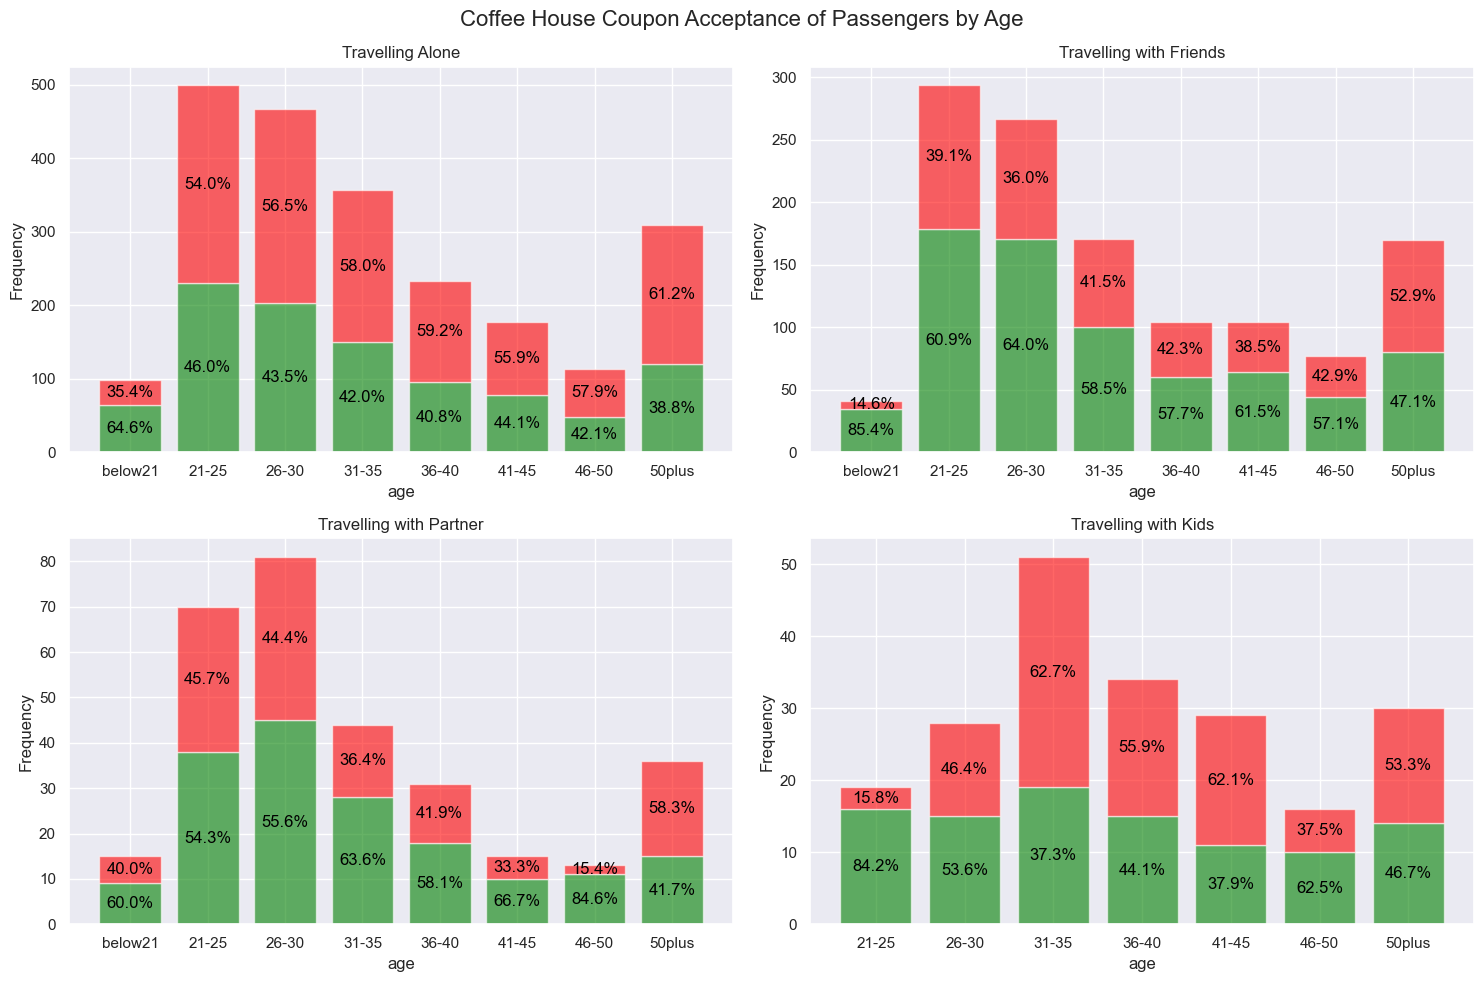
                <em>Figure: Coffee House Coupon Acceptance of Passengers by Age</em>
            </td>
        </tr>
    </table>
</div>







In [45]:










passenger_age_grid_image64, age_df = create_subplot_grid_dflist(df_list, 'age', "Coffee House Coupon Acceptance of Passengers by Age", subplot_labels,0,'linear',
                                                        ['below21','21-25','26-30','31-35','36-40','41-45', '46-50','50plus' ])



    
markdown_text = f"""

# 9.5 Coffee House Coupon Acceptance of Passengers by Age

## Overview

Section 9.5 focuses on analyzing the Coffee House coupon acceptance rates among different age groups of passengers. This analysis aims to identify age-related trends in coupon acceptance, which are essential for tailoring age-specific marketing strategies.

## Methodology

- **Data Selection**: The analysis considered passengers who were offered Coffee House coupons, with the data segmented by age groups.
- **Visualization Approach**: Utilized bar plots to display acceptance rates for various age groups across different passenger categories, highlighting the relationship between age and coupon acceptance behavior.

## Findings and Observations

1. **Age Group Acceptance Patterns:**
   - **Travelling Alone**: 
     - Highest acceptance rate observed in the 'below21' age group (64.65%), but with a low offer count (99), indicating potential for targeting younger solo travelers.
     - A gradual decline in acceptance rate observed with increasing age, with the '50plus' age group showing the lowest rate (38.83%).
   - **Travelling with Friends**: 
     - Remarkably high acceptance rates in younger age groups, especially 'below21' (85.37%) and '21-25' (60.88%), suggesting effectiveness in targeting these age brackets.
     - Consistent acceptance rates across older age groups, but with varying offer counts, indicating a need for balanced promotion across all age brackets.
   - **Travelling with Partner**: 
     - Notable high acceptance rate in the '46-50' age group (84.62%), albeit with a very low offer count (13), suggesting an untapped market.
     - Balanced acceptance rates across other age groups, with a potential increase in offers needed for the '50plus' group (41.67% acceptance rate).
   - **Travelling with Kids**: 
     - Limited data availability, with no data for 'below21' and highest acceptance in the '21-25' age group (84.21%). 
     - Observably lower acceptance rates in the '31-35' and '41-45' age groups, implying a potential need for more tailored offers for families in these age brackets.

2. **Strategic Marketing Considerations:**
   - **Youth-Oriented Promotions**: High acceptance rates among younger passengers, particularly when traveling with friends, highlight the need for youth-centric marketing campaigns.
   - **Targeted Offers for Older Age Groups**: For older passengers, especially those traveling with partners or kids, more tailored and frequent offers could better engage these segments.
   - **Data Gaps**: The absence of data in some age groups, particularly for passengers traveling with kids, suggests a need for more comprehensive data collection to better understand these demographics.

3. **Conclusion:**
   - Age significantly influences coupon acceptance behavior, with distinct patterns observed across different age groups. By aligning marketing strategies with these age-specific trends, Coffee House could enhance the effectiveness of its promotional campaigns and better engage diverse passenger demographics.


<div align="center">
        <tr>
            <td style="text-align: center;">
                <img src="data:image/png;base64,{passenger_age_grid_image64}" alt="Coffee House Coupon Acceptance of Passengers by Age" style="width: 100%;"/>
                <em>Figure: Coffee House Coupon Acceptance of Passengers by Age</em>
            </td>
        </tr>
    </table>
</div>





"""
display(Markdown(markdown_text))


# 9.6 Coffee House Coupon Acceptance of Passengers by Income

## Overview

Section 9.6 investigates the acceptance rates of Coffee House coupons among passengers segmented by income, examining how financial status influences coupon usage.

## Methodology

- **Data Selection**: Analysis centered on Coffee House coupon offers to passengers, categorized by their income levels.
- **Visualization Approach**: Employed bar plots to depict acceptance rates across various income brackets for different passenger categories, providing insights into income-based preferences in coupon acceptance.

## Findings and Observations

1. **Category-Specific and Income-Based Trends:**
   - **Travelling Alone**: 
     - Generally lower acceptance rates compared to other categories, with a noticeable decline in acceptance as income increases.
     - Higher rates in the lowest income brackets, suggesting price sensitivity or higher value perception of coupons among this group.
   - **Travelling with Friends**: 
     - Consistently higher acceptance rates across most income brackets, especially notable in the 'Less than $12500' range.
     - Indicates a trend where group dynamics might influence a positive response to coupon offers.
   - **Travelling with Partner**: 
     - Varied acceptance rates with a marked peak in the '$87500−99999' bracket, suggesting a specific appeal of offers to this income segment.
   - **Travelling with Kids**: 
     - Limited data, but shows 100% acceptance in the 'Less than $12500' bracket, though based on very few offers.
     - Indicates potential for targeting low-income families with tailored offers.

2. **Overall Acceptance Rate Insights:**
   - **Solo Travelers**: The overall lower acceptance rates in this category suggest a need for more compelling or personalized offers to engage these individuals effectively.
   - **Groups and Partners**: Higher rates in these categories imply that social factors and partnership dynamics play a significant role in coupon acceptance. Offers that cater to group activities or couple experiences could be particularly effective.

3. **Strategic Marketing Recommendations:**
   - **Enhanced Focus on Lower Income Brackets**: High acceptance rates in the lower income brackets across categories highlight the importance of targeting these segments.
   - **Tailored Offers for Solo Travelers**: Given the lower overall acceptance rates, there is an opportunity to refine offers for solo travelers, possibly focusing on individualized experiences or benefits.

4. **Conclusion:**
   - The analysis reveals that solo travelers generally show lower coupon acceptance rates, suggesting a need for more personalized offers for this group. In contrast, passengers in groups, particularly in lower income brackets, are more receptive to coupons. This indicates an opportunity for targeted promotions that leverage group dynamics and cost sensitivity. Tailoring strategies to these insights can enhance the effectiveness of Coffee House's marketing campaigns.


<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                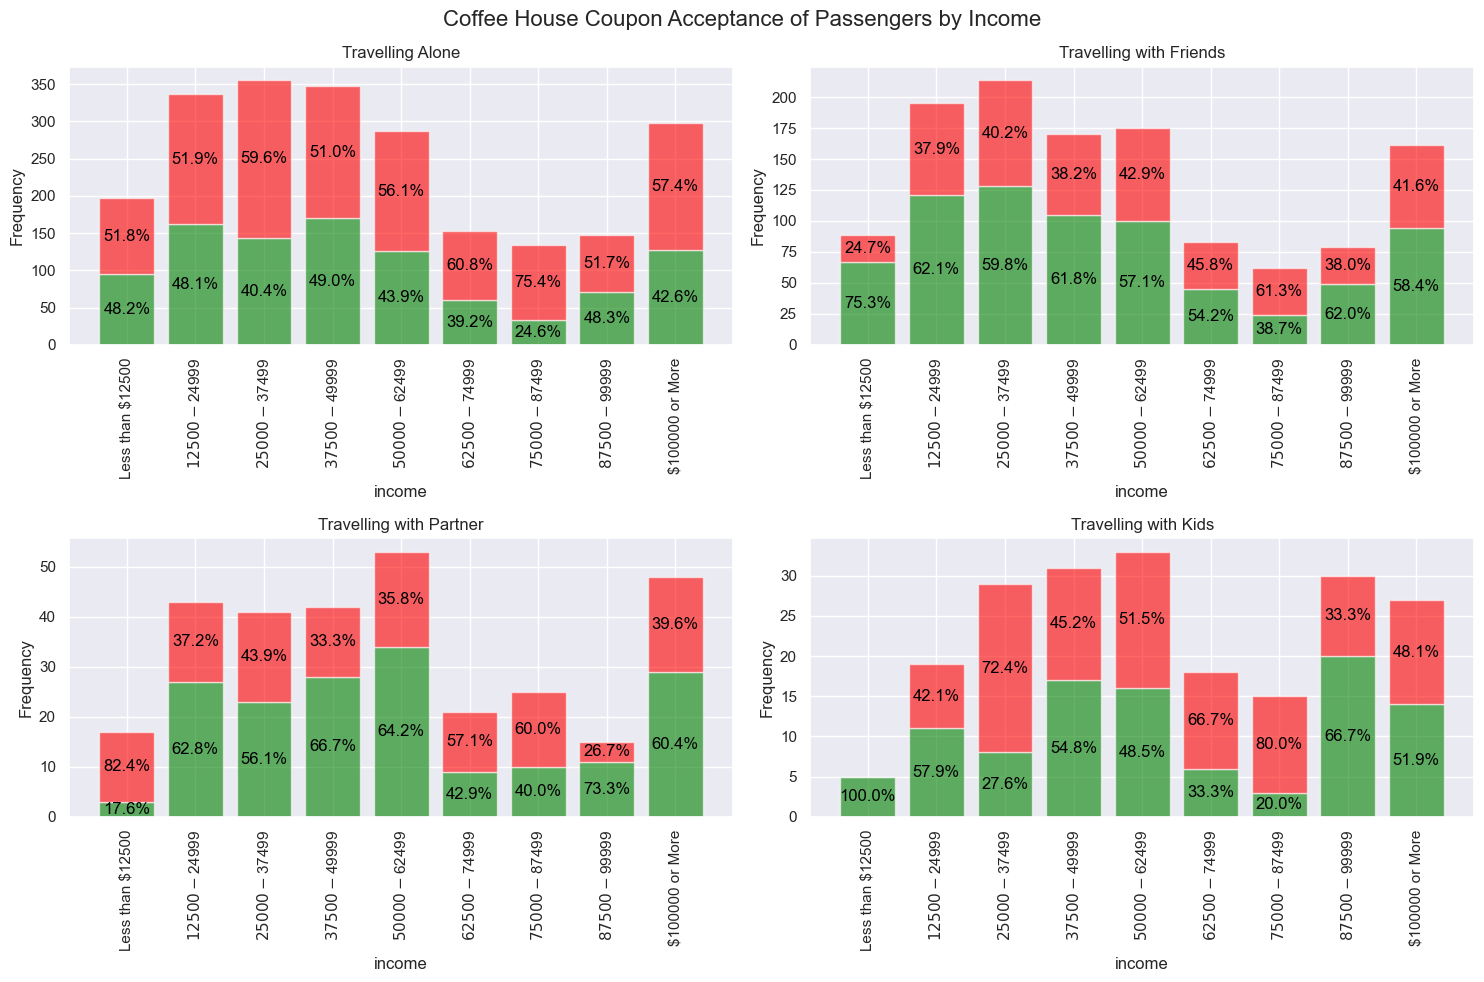
                <em>Figure: Coffee House Coupon Acceptance of Passengers by Destination</em>
            </td>
        </tr>
    </table>
</div>

---


In [63]:
plot_title = 'Coffee House Coupon Acceptance of Passengers by Income'
ordering = ['Less than $12500',
 '$12500 - $24999',
 '$25000 - $37499',
 '$37500 - $49999',
 '$50000 - $62499',
 '$62500 - $74999',
 '$75000 - $87499',
 '$87500 - $99999',
 '$100000 or More']

passenger_income_grid_image64, income_df = create_subplot_grid_dflist(df_list, 'income', plot_title, subplot_labels,90,'linear',ordering)

markdown_text = f"""
# 9.6 Coffee House Coupon Acceptance of Passengers by Income

## Overview

Section 9.6 investigates the acceptance rates of Coffee House coupons among passengers segmented by income, examining how financial status influences coupon usage.

## Methodology

- **Data Selection**: Analysis centered on Coffee House coupon offers to passengers, categorized by their income levels.
- **Visualization Approach**: Employed bar plots to depict acceptance rates across various income brackets for different passenger categories, providing insights into income-based preferences in coupon acceptance.

## Findings and Observations

1. **Category-Specific and Income-Based Trends:**
   - **Travelling Alone**: 
     - Generally lower acceptance rates compared to other categories, with a noticeable decline in acceptance as income increases.
     - Higher rates in the lowest income brackets, suggesting price sensitivity or higher value perception of coupons among this group.
   - **Travelling with Friends**: 
     - Consistently higher acceptance rates across most income brackets, especially notable in the 'Less than $12500' range.
     - Indicates a trend where group dynamics might influence a positive response to coupon offers.
   - **Travelling with Partner**: 
     - Varied acceptance rates with a marked peak in the '$87500−99999' bracket, suggesting a specific appeal of offers to this income segment.
   - **Travelling with Kids**: 
     - Limited data, but shows 100% acceptance in the 'Less than $12500' bracket, though based on very few offers.
     - Indicates potential for targeting low-income families with tailored offers.

2. **Overall Acceptance Rate Insights:**
   - **Solo Travelers**: The overall lower acceptance rates in this category suggest a need for more compelling or personalized offers to engage these individuals effectively.
   - **Groups and Partners**: Higher rates in these categories imply that social factors and partnership dynamics play a significant role in coupon acceptance. Offers that cater to group activities or couple experiences could be particularly effective.

3. **Strategic Marketing Recommendations:**
   - **Enhanced Focus on Lower Income Brackets**: High acceptance rates in the lower income brackets across categories highlight the importance of targeting these segments.
   - **Tailored Offers for Solo Travelers**: Given the lower overall acceptance rates, there is an opportunity to refine offers for solo travelers, possibly focusing on individualized experiences or benefits.

4. **Conclusion:**
   - The analysis reveals that solo travelers generally show lower coupon acceptance rates, suggesting a need for more personalized offers for this group. In contrast, passengers in groups, particularly in lower income brackets, are more receptive to coupons. This indicates an opportunity for targeted promotions that leverage group dynamics and cost sensitivity. Tailoring strategies to these insights can enhance the effectiveness of Coffee House's marketing campaigns.


<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                <img src="data:image/png;base64,{passenger_income_grid_image64}" alt="Coffee House Coupon Acceptance of Passengers by Destination" style="width: 100%;"/>
                <em>Figure: Coffee House Coupon Acceptance of Passengers by Destination</em>
            </td>
        </tr>
    </table>
</div>

---
"""
display(Markdown(markdown_text))

In [64]:




def create_stacked_bar_plot_with_filters1(filters, filter_labels, plot_title, group_descriptions, df_cleaned, rotation=0, yscale='linear', buffer=io.BytesIO()):
    plt.figure(figsize=(12, 8))

    # DataFrame to store results
    results_df = pd.DataFrame(columns=['Group', 'Total_Count', 'Accept_Count', 'Reject_Count', 'Accept_Percentage', 'Reject_Percentage'])

    # Apply each filter and plot the corresponding bar
    for i, (filter_condition, label) in enumerate(zip(filters, filter_labels)):
        # Apply filter
        if filter_condition is not None:
            filtered_df = df_cleaned.query(filter_condition) if isinstance(filter_condition, str) else df_cleaned[filter_condition]
        else:
            filtered_df = df_cleaned

        # Calculate acceptance counts
        acceptance_counts = filtered_df['Y'].value_counts().reindex([0, 1], fill_value=0)
        total_count = acceptance_counts.sum()
        accept_count = acceptance_counts.get(1, 0)
        reject_count = acceptance_counts.get(0, 0)

        # Percentages for annotation
        accept_percentage = (accept_count / total_count) * 100 if total_count else 0
        reject_percentage = (reject_count / total_count) * 100 if total_count else 0

        # Add results to DataFrame
        results_df = results_df.append({'Group': label, 'Total_Count': total_count, 'Accept_Count': accept_count, 
                                        'Reject_Count': reject_count, 'Accept_Percentage': accept_percentage, 
                                        'Reject_Percentage': reject_percentage}, ignore_index=True)

        # Plot bars
        plt.bar(label, accept_count, color='green', alpha=0.6)
        plt.bar(label, reject_count, bottom=accept_count, color='red', alpha=0.6)

        # Annotate bars
        if accept_count > 0:
            plt.text(label, accept_count / 2, f'{accept_percentage:.1f}%', ha='center', va='center', color='black')
        if reject_count > 0:
            plt.text(label, accept_count + reject_count / 2, f'{reject_percentage:.1f}%', ha='center', va='center', color='black')

    # Set plot parameters
    plt.xticks(rotation=rotation)
    plt.title(plot_title)
    plt.ylabel('Frequency')
    plt.xlabel('Groups')
    plt.yscale(yscale)
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.2)

    if group_descriptions is not None:
        legend_labels = [f'{key}: {value}' for key, value in group_descriptions.items()]
        plt.legend(title='Group Descriptions', title_fontsize='13', loc='upper right', labels=legend_labels, borderaxespad=0.)

    image_base64 = save_plot_as_base64(buffer, plt, rotation, yscale)

    return image_base64, results_df


In [ ]:
nan_sum_grouped

In [ ]:
nan_sum_grouped_filtered = nan_sum_grouped[nan_sum_grouped.sum(axis=1) > 0]


In [10]:
nan_sum_grouped_filtered

NameError: name 'nan_sum_grouped_filtered' is not defined

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check if 'subplot_label' and 'category' are in the columns (this could be causing the error)
if 'subplot_label' in nan_sum_grouped.columns or 'category' in nan_sum_grouped.columns:
    # If they are, rename these columns to avoid conflict
    nan_sum_grouped = nan_sum_grouped.rename(columns={'subplot_label': 'subplot_label_col', 'category': 'category_col'})

# Now reset the index
nan_sum_grouped_reset = nan_sum_grouped.reset_index()

# Create a pivot table for the heatmap
# Replace 'accept_count' with the appropriate column name for NaN count
pivot_table = nan_sum_grouped_reset.pivot('subplot_label', 'category', 'accept_count')

# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, cmap='binary', center=0.5, fmt="g")
plt.title("NaN Counts in DataFrame Grouped by subplot_label and category")
plt.ylabel("subplot_label")
plt.xlabel("category")
plt.show()


NameError: name 'nan_sum_grouped' is not defined

In [ ]:
nan_sum_grouped